# Proyecto MLP

##### Statistical Learning II
##### Gustavo Alvarado
##### Carnet # 20063401 

## Tema 
Predicción del próximo campén del mundial de fútbol Qatar 2022.

## Fuentes de datos

* Resultados de partidos de fútbol de selecciones desde 1872 a 2022. https://www.kaggle.com/datasets/martj42/international-football-results-from-1872-to-2017
* Ranking de selecciones de fútbol de la FIFA a agosto 2022. https://www.fifa.com/fifa-world-ranking/men?dateId=id13750
* Resultados de penalties en los mundiales de fútbol desde 1982 a 2018. https://en.wikipedia.org/wiki/List_of_FIFA_World_Cup_penalty_shoot-outs. 

Consideraciones: 

* Como parte de la preparación de los datos, se hizo una combinación de las primeras dos fuentes de datos, para tener como referencia y ser utilizados como variables, el actual ranking de cada equipo.

* Se excluyeron partidos de equipos que no forman parte de la FIFA, es decir, que no aparecen en el ranking. 

* Se utilizan los resultados de penalties en los mundiales de fútbol para para predicción de resultados de posibles penalties en fases finales, en caso de empate. 

* Para darle un mayor peso numérico a los partidos que se juegan en cancha de uno de los dos equipos, se convirtieron los valores neutrales = 0 a 10 y los valores neutrales = 1 a 5. 


In [1]:
import numpy as np
import pandas as pd
import io
import math
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.optimizers import SGD 
from tensorflow.keras.regularizers import L2

In [2]:
keras.backend

<module 'keras.api._v2.keras.backend' from '/usr/local/lib/python3.7/dist-packages/keras/api/_v2/keras/backend/__init__.py'>

In [52]:
from google.colab import files
uploaded = files.upload()

Saving Resultados.xlsx to Resultados (1).xlsx


## Carga de datos

Fuente de datos: 

In [54]:
resultados = pd.read_excel(io.BytesIO(uploaded['Resultados.xlsx']), sheet_name='Results')
resultados

,date,home_team,ranking_home_team,away_team,ranking_away_team,home_score,away_score,tournament,city,country,neutral
0,1872-11-30,Scotland,45,England,5,0,0,Friendly,Glasgow,Scotland,10
1,1873-03-08,England,5,Scotland,45,4,2,Friendly,London,England,10
2,1874-03-07,Scotland,45,England,5,2,1,Friendly,Glasgow,Scotland,10
3,1875-03-06,England,5,Scotland,45,2,2,Friendly,London,England,10
4,1876-03-04,Scotland,45,England,5,3,0,Friendly,Glasgow,Scotland,10
...,...,...,...,...,...,...,...,...,...,...,...
41201,2022-06-14,Moldova,177,Andorra,152,2,1,UEFA Nations League,Chișinău,Moldova,10
41202,2022-06-14,Liechtenstein,194,Latvia,129,0,2,UEFA Nations League,Vaduz,Liechtenstein,10
41203,2022-06-14,Chile,29,Ghana,60,0,0,Kirin Cup,Suita,Japan,5
41204,2022-06-14,Japan,24,Tunisia,30,0,3,Kirin Cup,Suita,Japan,10


In [55]:
ranking = pd.read_excel(io.BytesIO(uploaded['Resultados.xlsx']), sheet_name='Ranking')
ranking

,team,RK
0,Brazil,1
1,Belgium,2
2,Argentina,3
3,France,4
4,England,5
...,...,...
206,Sri Lanka,207
207,United States Virgin Islands,208
208,British Virgin Islands,209
209,Anguilla,210


In [57]:
penalties = pd.read_excel(io.BytesIO(uploaded['Resultados.xlsx']), sheet_name='Penalties')
penalties

,date,home_team,ranking_home_team,away_team,ranking_away_team,home_score,away_score,neutral
0,1982,Germany,11,France,4,5,4,1
1,1986,France,4,Brazil,1,4,3,1
2,1986,Mexico,12,Germany,11,1,4,0
3,1986,Belgium,2,Spain,6,5,4,1
4,1990,Republic of Ireland,47,Romania,54,5,4,1
5,1990,Argentina,3,Serbia,25,3,2,1
6,1990,Italy,7,Argentina,3,3,4,0
7,1990,Germany,11,England,5,4,3,1
8,1994,Bulgaria,74,Mexico,12,3,1,1
9,1994,Sweden,20,Romania,54,5,4,1


## Definición de variables

Se definen 3 variables de entrada: (1) ranking equipo local, (2) ranking equipo visitante, y (3) bandera que define si el partido se jugó en una cancha neutral. 

Se definen 2 variables de salida: (1) goles equpo local, (2) goles equipo visitante. 

In [58]:
x1 = resultados['ranking_home_team'].values
x2 = resultados['ranking_away_team'].values
x3 = resultados['neutral'].values

y1 = resultados['home_score'].values
y2 = resultados['away_score'].values

X = np.vstack((x1, x2, x3)).T
Y = np.vstack((y1, y2)).T

In [59]:
x1P = penalties['ranking_home_team'].values
x2P = penalties['ranking_away_team'].values
x3P = penalties['neutral'].values

y1P = penalties['home_score'].values
y2P = penalties['away_score'].values

XP = np.vstack((x1P, x2P, x3P)).T
YP = np.vstack((y1P, y2P)).T

## Función de predicción de resultados

In [104]:
def predictScore(model, homeTeam, awayTeam, neutral = 5):
  rankingHomeTeam = int(ranking[ranking['team'] == homeTeam]['RK'].values[0])
  rankingAwayTeam = int(ranking[ranking['team'] == awayTeam]['RK'].values[0])
  scores = model.predict([[rankingHomeTeam, rankingAwayTeam, neutral]])
  homeTeamScore = round(scores[0][0])
  awayTeamScore = round(scores[0][1])
  print(homeTeam, homeTeamScore, '-', awayTeam, awayTeamScore)
  return 

## Experimento 1

Primer experimento, con tres variables de entrada (goles local, goles visita y bandera para definir si el partido es en cancha neutral)  3 capas ocultas y activación tanh. Utilizando mini-batch con batch-size de 50.

In [60]:
model1 = keras.Sequential([
                          keras.layers.Dense(units = 5,input_shape=[3],activation="tanh"),
                          keras.layers.Dense(units = 4,activation="tanh",
                                             kernel_regularizer=L2(l2=0.001)),
                          keras.layers.Dense(units = 3,activation="tanh",
                                             kernel_regularizer=L2(l2=0.001)),
                          keras.layers.Dense(units=2,activation=None)]
                         )

In [62]:
model1.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_28 (Dense)            (None, 5)                 20        
                                                                 
 dense_29 (Dense)            (None, 4)                 24        
                                                                 
 dense_30 (Dense)            (None, 3)                 15        
                                                                 
 dense_31 (Dense)            (None, 2)                 8         
                                                                 
Total params: 67
Trainable params: 67
Non-trainable params: 0
_________________________________________________________________


In [82]:
model1.compile(optimizer = 'adam',loss='mean_squared_error', 
              metrics=['mae', 'accuracy']
              )  

In [84]:
history1 = model1.fit(X, Y, epochs = 150, batch_size = 50, validation_split = 0.15)

Epoch 1/150
701/701 [==============================] - 2s 3ms/step - loss: 2.2516 - mae: 1.0830 - accuracy: 0.6565 - val_loss: 1.8595 - val_mae: 1.0110 - val_accuracy: 0.7483
Epoch 2/150
701/701 [==============================] - 2s 3ms/step - loss: 2.2383 - mae: 1.0769 - accuracy: 0.6565 - val_loss: 1.7977 - val_mae: 0.9982 - val_accuracy: 0.7526
Epoch 3/150
701/701 [==============================] - 2s 3ms/step - loss: 2.2105 - mae: 1.0707 - accuracy: 0.6737 - val_loss: 1.7710 - val_mae: 0.9915 - val_accuracy: 0.7576
Epoch 4/150
701/701 [==============================] - 2s 3ms/step - loss: 2.2025 - mae: 1.0715 - accuracy: 0.6811 - val_loss: 1.7675 - val_mae: 0.9892 - val_accuracy: 0.7518
Epoch 5/150
701/701 [==============================] - 3s 4ms/step - loss: 2.2020 - mae: 1.0685 - accuracy: 0.6824 - val_loss: 1.7673 - val_mae: 0.9980 - val_accuracy: 0.7544
Epoch 6/150
701/701 [==============================] - 2s 3ms/step - loss: 2.2012 - mae: 1.0737 - accuracy: 0.6828 - val_loss

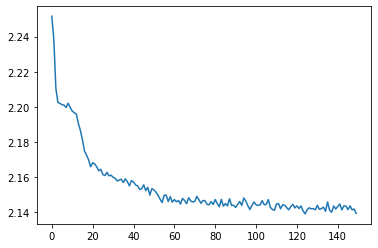

In [85]:
plt.plot(history1.history['loss'])
plt.show()

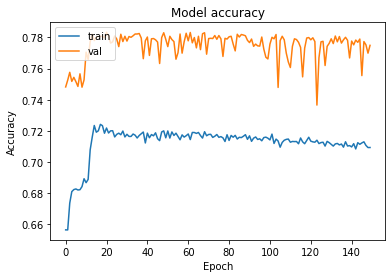

In [96]:
plt.plot(history1.history['accuracy'])
plt.plot(history1.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [105]:
#Group A
predictScore(model1, 'Qatar', 'Ecuador', 10)
predictScore(model1, 'Senegal', 'Netherlands')
predictScore(model1, 'Qatar', 'Senegal', 10)
predictScore(model1, 'Netherlands', 'Ecuador')
predictScore(model1, 'Ecuador', 'Senegal')
predictScore(model1, 'Qatar', 'Netherlands', 10)


Qatar 2 - Ecuador 1
Senegal 1 - Netherlands 1
Qatar 2 - Senegal 1
Netherlands 2 - Ecuador 1
Ecuador 1 - Senegal 2
Qatar 1 - Netherlands 2


In [106]:
#Group B
predictScore(model1, 'England', 'Iran')
predictScore(model1, 'United States', 'Wales')
predictScore(model1, 'Wales', 'Iran')
predictScore(model1, 'England', 'United States')
predictScore(model1, 'Wales', 'England')
predictScore(model1, 'Iran', 'United States')

England 2 - Iran 1
United States 2 - Wales 1
Wales 2 - Iran 1
England 2 - United States 1
Wales 1 - England 2
Iran 1 - United States 1


### Conclusiones experimento 1

El modelo tiene una exactitud de alrededor de 71%. El modelo parece darle un peso adecuado a la condición de local de Qatar, ya que, por ejemplo, lo coloca como ganador del duelo ante Senegal, el cual tiene un ranking mucho más alto que el de Qatar. Sin embargo, se observa que el modelo no es capaz de predecir más de 2 goles o menos de 1 gol.



## Experimento 2

Primer experimento, con tres variables de entrada (goles local, goles visita y bandera para definir si el partido es en cancha neutral)  3 capas ocultas y activación relu. Utilizando mini-batch con batch-size de 100.


In [100]:
model2 = keras.Sequential([
                          keras.layers.Dense(units = 5,input_shape=[3],activation="relu"),
                          keras.layers.Dense(units = 4,activation="relu",
                                             kernel_regularizer=L2(l2=0.001)),
                          keras.layers.Dense(units = 3,activation="relu",
                                             kernel_regularizer=L2(l2=0.001)),
                          keras.layers.Dense(units=2,activation=None)]
                         )


In [101]:
model2.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_36 (Dense)            (None, 5)                 20        
                                                                 
 dense_37 (Dense)            (None, 4)                 24        
                                                                 
 dense_38 (Dense)            (None, 3)                 15        
                                                                 
 dense_39 (Dense)            (None, 2)                 8         
                                                                 
Total params: 67
Trainable params: 67
Non-trainable params: 0
_________________________________________________________________


In [102]:
model2.compile(optimizer = 'adam',loss='mean_squared_error', 
              metrics=['mae', 'accuracy']
              )  

In [103]:
history2 = model2.fit(X, Y, epochs = 150, batch_size = 100, validation_split = 0.15)

Epoch 1/150
351/351 [==============================] - 2s 3ms/step - loss: 568.3795 - mae: 15.1411 - accuracy: 0.3723 - val_loss: 28.1349 - val_mae: 3.7762 - val_accuracy: 0.4208
Epoch 2/150
351/351 [==============================] - 1s 2ms/step - loss: 11.6989 - mae: 2.2660 - accuracy: 0.4777 - val_loss: 7.2269 - val_mae: 1.7419 - val_accuracy: 0.5870
Epoch 3/150
351/351 [==============================] - 1s 3ms/step - loss: 5.6221 - mae: 1.6007 - accuracy: 0.6012 - val_loss: 4.3095 - val_mae: 1.3849 - val_accuracy: 0.6727
Epoch 4/150
351/351 [==============================] - 1s 2ms/step - loss: 4.2167 - mae: 1.3997 - accuracy: 0.6595 - val_loss: 3.2728 - val_mae: 1.2147 - val_accuracy: 0.7175
Epoch 5/150
351/351 [==============================] - 1s 2ms/step - loss: 3.5778 - mae: 1.2779 - accuracy: 0.6930 - val_loss: 2.7312 - val_mae: 1.0964 - val_accuracy: 0.7471
Epoch 6/150
351/351 [==============================] - 1s 2ms/step - loss: 3.2041 - mae: 1.1941 - accuracy: 0.7126 - val

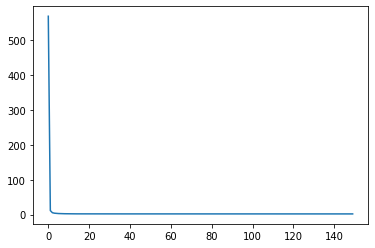

In [107]:
plt.plot(history2.history['loss'])
plt.show()

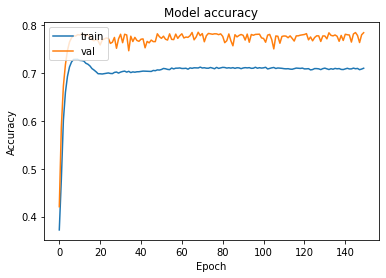

In [108]:
plt.plot(history2.history['accuracy'])
plt.plot(history2.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [109]:
#Group A
predictScore(model2, 'Qatar', 'Ecuador', 10)
predictScore(model2, 'Senegal', 'Netherlands')
predictScore(model2, 'Qatar', 'Senegal', 10)
predictScore(model2, 'Netherlands', 'Ecuador')
predictScore(model2, 'Ecuador', 'Senegal')
predictScore(model2, 'Qatar', 'Netherlands', 10)


Qatar 2 - Ecuador 1
Senegal 1 - Netherlands 1
Qatar 1 - Senegal 1
Netherlands 2 - Ecuador 1
Ecuador 1 - Senegal 1
Qatar 1 - Netherlands 1


In [110]:
predictScore(model2, 'England', 'Iran')
predictScore(model2, 'United States', 'Wales')
predictScore(model2, 'Wales', 'Iran')
predictScore(model2, 'England', 'United States')
predictScore(model2, 'Wales', 'England')
predictScore(model2, 'Iran', 'United States')

England 2 - Iran 1
United States 2 - Wales 1
Wales 2 - Iran 1
England 2 - United States 1
Wales 1 - England 1
Iran 1 - United States 1


### Conclusiones experimento 2

El modelo tiene una exactitud de alrededor de 71%. Se observa cierta mejora con respecto al modelo anterior. 


## Experimento 3

Tercer experimento, con tres variables de entrada (goles local, goles visita y bandera para definir si el partido es en cancha neutral), 1 capa oculta y activación tanh. Utilizando mini-batch con batch-size de 50.


In [112]:
model3 = keras.Sequential([
                          keras.layers.Dense(units = 4,input_shape=[3],activation="tanh"),
                          keras.layers.Dense(units = 3,activation="tanh",
                                             kernel_regularizer=L2(l2=0.001)),
                          keras.layers.Dense(units=2,activation=None)]
                         )


In [113]:
model3.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_40 (Dense)            (None, 4)                 16        
                                                                 
 dense_41 (Dense)            (None, 3)                 15        
                                                                 
 dense_42 (Dense)            (None, 2)                 8         
                                                                 
Total params: 39
Trainable params: 39
Non-trainable params: 0
_________________________________________________________________


In [114]:
model3.compile(optimizer = 'adam',loss='mean_squared_error', 
              metrics=['mae', 'accuracy']
              )  

In [115]:
history3 = model3.fit(X, Y, epochs = 150, batch_size = 50, validation_split = 0.15)

Epoch 1/150
701/701 [==============================] - 3s 3ms/step - loss: 3.3608 - mae: 1.2730 - accuracy: 0.5684 - val_loss: 1.8695 - val_mae: 1.0096 - val_accuracy: 0.7120
Epoch 2/150
701/701 [==============================] - 2s 2ms/step - loss: 2.2578 - mae: 1.0889 - accuracy: 0.6219 - val_loss: 1.8572 - val_mae: 1.0256 - val_accuracy: 0.6970
Epoch 3/150
701/701 [==============================] - 2s 2ms/step - loss: 2.2536 - mae: 1.0906 - accuracy: 0.6298 - val_loss: 1.8459 - val_mae: 1.0145 - val_accuracy: 0.7067
Epoch 4/150
701/701 [==============================] - 2s 2ms/step - loss: 2.2545 - mae: 1.0952 - accuracy: 0.6071 - val_loss: 1.8425 - val_mae: 1.0182 - val_accuracy: 0.6989
Epoch 5/150
701/701 [==============================] - 2s 2ms/step - loss: 2.2495 - mae: 1.0908 - accuracy: 0.6225 - val_loss: 1.8403 - val_mae: 1.0153 - val_accuracy: 0.7081
Epoch 6/150
701/701 [==============================] - 2s 3ms/step - loss: 2.2451 - mae: 1.0896 - accuracy: 0.6218 - val_loss

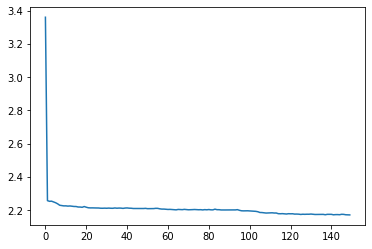

In [116]:
plt.plot(history3.history['loss'])
plt.show()


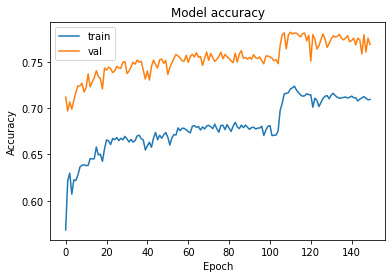

In [117]:
plt.plot(history3.history['accuracy'])
plt.plot(history3.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [119]:
#Group A
predictScore(model3, 'Qatar', 'Ecuador', 10)
predictScore(model3, 'Senegal', 'Netherlands')
predictScore(model3, 'Qatar', 'Senegal', 10)
predictScore(model3, 'Netherlands', 'Ecuador')
predictScore(model3, 'Ecuador', 'Senegal')
predictScore(model3, 'Qatar', 'Netherlands', 10)


Qatar 2 - Ecuador 1
Senegal 1 - Netherlands 1
Qatar 1 - Senegal 1
Netherlands 3 - Ecuador 1
Ecuador 1 - Senegal 1
Qatar 1 - Netherlands 2


In [121]:
#Group B
predictScore(model3, 'England', 'Iran')
predictScore(model3, 'United States', 'Wales')
predictScore(model3, 'Wales', 'Iran')
predictScore(model3, 'England', 'United States')
predictScore(model3, 'Wales', 'England')
predictScore(model3, 'Iran', 'United States')

England 2 - Iran 1
United States 2 - Wales 1
Wales 2 - Iran 1
England 2 - United States 1
Wales 1 - England 2
Iran 1 - United States 1


### Conclusiones experimento 3

El modelo tiene una exactitud de alrededor de 71%, el cual es similar a los dos experimentos anteriores. Sin embargo, este modelo si da una diferencia ya que si es capaz de predecir más de dos goles en algún resultado. 


## Experimento 4

Cuarto experimento, con tres variables de entrada (goles local, goles visita y bandera para definir si el partido es en cancha neutral),  4 capas ocultas y activación tanh. Utilizando mini-batch con batch-size de 100.


In [126]:
model4 = keras.Sequential([
                          keras.layers.Dense(units = 6,input_shape=[3],activation="tanh"),
                          keras.layers.Dense(units = 5,activation="tanh",
                                             kernel_regularizer=L2(l2=0.001)),
                          keras.layers.Dense(units = 4,activation="tanh",
                                             kernel_regularizer=L2(l2=0.001)),
                           keras.layers.Dense(units = 3,activation="tanh",
                                             kernel_regularizer=L2(l2=0.001)),
                          keras.layers.Dense(units=2,activation=None)]
                         )


In [127]:
model4.summary()

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_48 (Dense)            (None, 6)                 24        
                                                                 
 dense_49 (Dense)            (None, 5)                 35        
                                                                 
 dense_50 (Dense)            (None, 4)                 24        
                                                                 
 dense_51 (Dense)            (None, 3)                 15        
                                                                 
 dense_52 (Dense)            (None, 2)                 8         
                                                                 
Total params: 106
Trainable params: 106
Non-trainable params: 0
_________________________________________________________________


In [128]:
model4.compile(optimizer = 'adam',loss='mean_squared_error', 
              metrics=['mae', 'accuracy']
              )  

In [129]:
history4 = model4.fit(X, Y, epochs = 150, batch_size = 100, validation_split = 0.15)


Epoch 1/150
351/351 [==============================] - 2s 3ms/step - loss: 2.8024 - mae: 1.1520 - accuracy: 0.5702 - val_loss: 2.1338 - val_mae: 1.0977 - val_accuracy: 0.7141
Epoch 2/150
351/351 [==============================] - 1s 2ms/step - loss: 2.3991 - mae: 1.1194 - accuracy: 0.7191 - val_loss: 2.0189 - val_mae: 1.0562 - val_accuracy: 0.7141
Epoch 3/150
351/351 [==============================] - 1s 3ms/step - loss: 2.2908 - mae: 1.0879 - accuracy: 0.6996 - val_loss: 1.8787 - val_mae: 1.0161 - val_accuracy: 0.7253
Epoch 4/150
351/351 [==============================] - 1s 2ms/step - loss: 2.2558 - mae: 1.0878 - accuracy: 0.6247 - val_loss: 1.8425 - val_mae: 1.0123 - val_accuracy: 0.7177
Epoch 5/150
351/351 [==============================] - 1s 3ms/step - loss: 2.2433 - mae: 1.0851 - accuracy: 0.6372 - val_loss: 1.8249 - val_mae: 1.0097 - val_accuracy: 0.7199
Epoch 6/150
351/351 [==============================] - 1s 3ms/step - loss: 2.2379 - mae: 1.0854 - accuracy: 0.6518 - val_loss

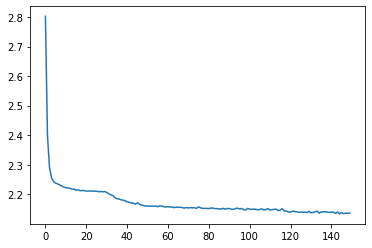

In [130]:

plt.plot(history4.history['loss'])
plt.show()


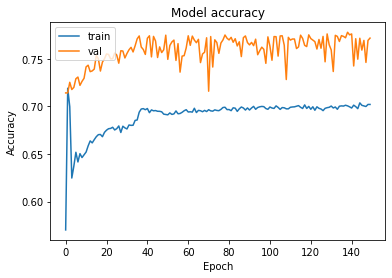

In [131]:
plt.plot(history4.history['accuracy'])
plt.plot(history4.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [133]:
#Group A
predictScore(model4, 'Qatar', 'Ecuador', 10)
predictScore(model4, 'Senegal', 'Netherlands')
predictScore(model4, 'Qatar', 'Senegal', 10)
predictScore(model4, 'Netherlands', 'Ecuador')
predictScore(model4, 'Ecuador', 'Senegal')
predictScore(model4, 'Qatar', 'Netherlands', 10)

Qatar 2 - Ecuador 1
Senegal 1 - Netherlands 2
Qatar 1 - Senegal 1
Netherlands 2 - Ecuador 1
Ecuador 1 - Senegal 2
Qatar 1 - Netherlands 1


In [134]:
#Group B
predictScore(model4, 'England', 'Iran')
predictScore(model4, 'United States', 'Wales')
predictScore(model4, 'Wales', 'Iran')
predictScore(model4, 'England', 'United States')
predictScore(model4, 'Wales', 'England')
predictScore(model4, 'Iran', 'United States')

England 2 - Iran 1
United States 1 - Wales 1
Wales 1 - Iran 1
England 2 - United States 1
Wales 1 - England 2
Iran 1 - United States 2


### Conclusiones experimento 4

El modelo tiene una exactitud de alrededor de 69%, por lo cual se evidencia que empeora el modelo mientras se agregan más capas ocultas.


## Experimento 5

Primer experimento, con tres variables de entrada (goles local, goles visita y bandera para definir si el partido es en cancha neutral), 1 capas oculta pero con más neuronas y activación relu. Utilizando mini-batch con batch-size de 100.


In [148]:
model5 = keras.Sequential([
                          keras.layers.Dense(units = 4,input_shape=[3],activation="relu"),
                          keras.layers.Dense(units = 3,activation="relu",
                                             kernel_regularizer=L2(l2=0.001)),
                          keras.layers.Dense(units=2,activation=None)]
                         )


In [149]:
model5.summary()

Model: "sequential_17"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_62 (Dense)            (None, 4)                 16        
                                                                 
 dense_63 (Dense)            (None, 3)                 15        
                                                                 
 dense_64 (Dense)            (None, 2)                 8         
                                                                 
Total params: 39
Trainable params: 39
Non-trainable params: 0
_________________________________________________________________


In [150]:
model5.compile(optimizer = 'adam',loss='mean_squared_error', 
              metrics=['mae', 'accuracy']
              )  

In [151]:
history5 = model5.fit(X, Y, epochs = 150, batch_size = 100, validation_split = 0.15)

Epoch 1/150
351/351 [==============================] - 1s 3ms/step - loss: 69.4917 - mae: 5.6834 - accuracy: 0.3216 - val_loss: 15.5384 - val_mae: 2.5803 - val_accuracy: 0.2859
Epoch 2/150
351/351 [==============================] - 1s 2ms/step - loss: 8.3222 - mae: 1.9677 - accuracy: 0.2809 - val_loss: 5.4446 - val_mae: 1.6600 - val_accuracy: 0.2859
Epoch 3/150
351/351 [==============================] - 1s 2ms/step - loss: 4.2077 - mae: 1.4430 - accuracy: 0.2813 - val_loss: 3.1068 - val_mae: 1.2724 - val_accuracy: 0.2856
Epoch 4/150
351/351 [==============================] - 1s 2ms/step - loss: 2.9818 - mae: 1.2132 - accuracy: 0.3082 - val_loss: 2.2525 - val_mae: 1.0927 - val_accuracy: 0.3794
Epoch 5/150
351/351 [==============================] - 1s 2ms/step - loss: 2.3914 - mae: 1.1137 - accuracy: 0.6602 - val_loss: 1.7980 - val_mae: 1.0132 - val_accuracy: 0.7614
Epoch 6/150
351/351 [==============================] - 1s 2ms/step - loss: 2.2641 - mae: 1.0903 - accuracy: 0.7332 - val_lo

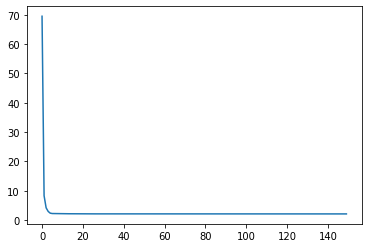

In [152]:
plt.plot(history5.history['loss'])
plt.show()

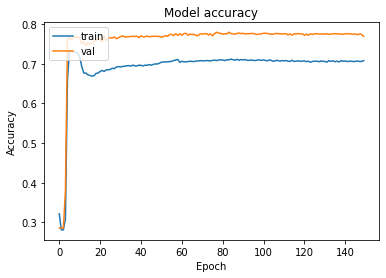

In [153]:
plt.plot(history5.history['accuracy'])
plt.plot(history5.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()


In [154]:
predictScore(model5, 'Qatar', 'Ecuador', 10)
predictScore(model5, 'Senegal', 'Netherlands')
predictScore(model5, 'Qatar', 'Senegal', 10)
predictScore(model5, 'Netherlands', 'Ecuador')
predictScore(model5, 'Ecuador', 'Senegal')
predictScore(model5, 'Qatar', 'Netherlands', 10)

Qatar 2 - Ecuador 1
Senegal 1 - Netherlands 1
Qatar 1 - Senegal 1
Netherlands 2 - Ecuador 1
Ecuador 1 - Senegal 2
Qatar 1 - Netherlands 1


In [155]:
predictScore(model5, 'England', 'Iran')
predictScore(model5, 'United States', 'Wales')
predictScore(model5, 'Wales', 'Iran')
predictScore(model5, 'England', 'United States')
predictScore(model5, 'Wales', 'England')
predictScore(model5, 'Iran', 'United States')

England 2 - Iran 1
United States 1 - Wales 1
Wales 1 - Iran 1
England 1 - United States 1
Wales 1 - England 1
Iran 1 - United States 1


### Conclusiones experimento 5

El modelo tiene una exactitud de alrededor de 71%, similar a los anteriores, sin embargo, no parece mejorar a las predicciones del experimento 3. 


## Modelo seleccionado

De los 5 experimentos anteriores, se puede evidenciar que en general, el modelo no obendrá una exactitud arriba del 72%, lo cual puede ser explicado por cierta aleatoriedad que existe en algunos casos en los resultados del fútbol de selcciones. De los 5 modelos, los que mejor resultados evidencia son los modelos 2 y 3. Para agregarle un grado de aleatoriedad a los resultados, tal y como sucede en la realidad, se utilizarán indistintamente los dos modelos para la predicción de los resultados. 

## Modelo para penalties

Creando un modelo similar para la estimación de penalties en caso de empate en las fases finales del mundial. Se utilizarán los mismos parámetros del experimento 3. 

In [215]:
modelPenalties = keras.Sequential([
                          keras.layers.Dense(units=5,input_shape=[3],activation="tanh"),
                          keras.layers.Dense(units = 3,activation="tanh", kernel_regularizer=L2(l2=0.001)),
                          keras.layers.Dense(units=2,activation=None)]
                         )

In [216]:
modelPenalties.summary()

Model: "sequential_19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_68 (Dense)            (None, 5)                 20        
                                                                 
 dense_69 (Dense)            (None, 3)                 18        
                                                                 
 dense_70 (Dense)            (None, 2)                 8         
                                                                 
Total params: 46
Trainable params: 46
Non-trainable params: 0
_________________________________________________________________


In [221]:
optimizer = SGD(learning_rate=0.01,momentum=0.9)
modelPenalties.compile(optimizer= optimizer,loss='mean_squared_error', 
              metrics=['mae', 'accuracy'])

In [262]:
historyPenalties = modelPenalties.fit(XP, YP, epochs=1000)

Epoch 1/1000
1/1 [==============================] - 0s 13ms/step - loss: 0.8036 - mae: 0.7089 - accuracy: 0.9333
Epoch 2/1000
1/1 [==============================] - 0s 12ms/step - loss: 0.8035 - mae: 0.7088 - accuracy: 0.9333
Epoch 3/1000
1/1 [==============================] - 0s 16ms/step - loss: 0.8034 - mae: 0.7087 - accuracy: 0.9333
Epoch 4/1000
1/1 [==============================] - 0s 13ms/step - loss: 0.8032 - mae: 0.7086 - accuracy: 0.9333
Epoch 5/1000
1/1 [==============================] - 0s 12ms/step - loss: 0.8031 - mae: 0.7085 - accuracy: 0.9333
Epoch 6/1000
1/1 [==============================] - 0s 18ms/step - loss: 0.8030 - mae: 0.7084 - accuracy: 0.9333
Epoch 7/1000
1/1 [==============================] - 0s 17ms/step - loss: 0.8028 - mae: 0.7083 - accuracy: 0.9333
Epoch 8/1000
1/1 [==============================] - 0s 14ms/step - loss: 0.8027 - mae: 0.7082 - accuracy: 0.9333
Epoch 9/1000
1/1 [==============================] - 0s 18ms/step - loss: 0.8026 - mae: 0.7081 - 

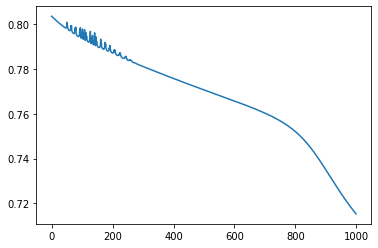

In [263]:
plt.plot(historyPenalties.history['loss'])
plt.show()

In [226]:
def predictPenalties(homeTeam, awayTeam, neutral = 5):
  rankingHomeTeam = int(ranking[ranking['team'] == homeTeam]['RK'].values[0])
  rankingAwayTeam = int(ranking[ranking['team'] == awayTeam]['RK'].values[0])
  scores = modelPenalties.predict([[rankingHomeTeam, rankingAwayTeam, neutral]])
  homeTeamScore = round(scores[0][0])
  awayTeamScore = round(scores[0][1])
  print('Penalties:', homeTeam, homeTeamScore, '-', awayTeam, awayTeamScore)
  return 

### Conculsiones modelo penalties

El modelo entrenado para penalties tiene una exactitud de 93%, lo cual es un valor bastante aceptable. 

## Predicción de resultados



### Fase de grupos

In [189]:
#Group A
predictScore(model2, 'Qatar', 'Ecuador', 10)
predictScore(model3, 'Senegal', 'Netherlands')
predictScore(model2, 'Qatar', 'Senegal', 10)
predictScore(model3, 'Netherlands', 'Ecuador')
predictScore(model2, 'Ecuador', 'Senegal')
predictScore(model3, 'Qatar', 'Netherlands', 10)

Qatar 2 - Ecuador 1
Senegal 1 - Netherlands 1
Qatar 1 - Senegal 1
Netherlands 3 - Ecuador 1
Ecuador 1 - Senegal 1
Qatar 1 - Netherlands 2


|Team| Points| Goal Difference|
--- | --- | ---|
|Netherlands|7|+3|
|Qatar|4|-1|
|Senegal|3|0|
|Ecuador|1|-3|




In [190]:
#Group B
predictScore(model2, 'England', 'Iran')
predictScore(model3, 'United States', 'Wales')
predictScore(model2, 'Wales', 'Iran')
predictScore(model3, 'England', 'United States')
predictScore(model2, 'Wales', 'England')
predictScore(model3, 'Iran', 'United States')

England 2 - Iran 1
United States 2 - Wales 1
Wales 2 - Iran 1
England 2 - United States 1
Wales 1 - England 1
Iran 1 - United States 1


|Team| Points| Goal Difference|
--- | --- | ---|
|England|7|+2|
|Wales|4|0|
|United States|4|0|
|Iran|1|-2|

In [191]:
#Group C
predictScore(model3, 'Argentina', 'Saudi Arabia')
predictScore(model2, 'Mexico', 'Poland')
predictScore(model3, 'Poland', 'Saudi Arabia')
predictScore(model2, 'Argentina', 'Mexico')
predictScore(model3, 'Poland', 'Argentina')
predictScore(model2, 'Saudi Arabia', 'Mexico')

Argentina 3 - Saudi Arabia 1
Mexico 2 - Poland 1
Poland 2 - Saudi Arabia 1
Argentina 2 - Mexico 1
Poland 1 - Argentina 2
Saudi Arabia 1 - Mexico 2


|Team| Points| Goal Difference|
--- | --- | ---|
|Argentina|9|+4|
|Mexico|6|+1|
|Poland|3|-1|
|Saudi Arabia|0|-4|

In [192]:
#Group D
predictScore(model3, 'France', 'Australia')
predictScore(model2, 'Denmark', 'Tunisia')
predictScore(model3, 'Tunisia', 'Australia')
predictScore(model2, 'France', 'Denmark')
predictScore(model3, 'Australia', 'Denmark')
predictScore(model2, 'Tunisia', 'France')

France 3 - Australia 1
Denmark 2 - Tunisia 1
Tunisia 2 - Australia 1
France 2 - Denmark 1
Australia 1 - Denmark 1
Tunisia 1 - France 2


|Team| Points| Goal Difference|
--- | --- | ---|
|France|9|+4|
|Denmark|4|0|
|Tunisia|3|-1|
|Australia|1|-3|

In [194]:
#Group E
predictScore(model2, 'Spain', 'Costa Rica')
predictScore(model3, 'Germany', 'Japan')
predictScore(model2, 'Japan', 'Costa Rica')
predictScore(model3, 'Spain', 'Germany')
predictScore(model2, 'Japan', 'Spain')
predictScore(model3, 'Costa Rica', 'Germany')


Spain 2 - Costa Rica 1
Germany 2 - Japan 1
Japan 2 - Costa Rica 1
Spain 2 - Germany 1
Japan 1 - Spain 1
Costa Rica 1 - Germany 1


|Team| Points| Goal Difference|
--- | --- | ---|
|Spain|7|+2|
|Germany|4|0|
|Japan|4|0|
|Costa Rica|1|-2|

In [196]:
#Group F
predictScore(model3, 'Belgium', 'Canada')
predictScore(model2, 'Morocco', 'Croatia')
predictScore(model2, 'Belgium', 'Morocco')
predictScore(model2, 'Croatia', 'Canada')
predictScore(model3, 'Croatia', 'Belgium')
predictScore(model2, 'Canada', 'Morocco')

Belgium 3 - Canada 1
Morocco 1 - Croatia 1
Belgium 2 - Morocco 1
Croatia 2 - Canada 1
Croatia 1 - Belgium 2
Canada 1 - Morocco 1


|Team| Points| Goal Difference|
--- | --- | ---|
|Belgium|9|+4|
|Croatia|4|0|
|Morocco|2|-2|
|Canada|1|-3|

In [197]:
#Group G
predictScore(model2, 'Switzerland', 'Cameroon')
predictScore(model3, 'Brazil', 'Serbia')
predictScore(model2, 'Cameroon', 'Serbia')
predictScore(model3, 'Brazil', 'Switzerland')
predictScore(model2, 'Serbia', 'Switzerland')
predictScore(model3, 'Cameroon', 'Brazil')

Switzerland 2 - Cameroon 1
Brazil 2 - Serbia 1
Cameroon 1 - Serbia 1
Brazil 2 - Switzerland 1
Serbia 1 - Switzerland 1
Cameroon 1 - Brazil 2


|Team| Points| Goal Difference|
--- | --- | ---|
|Brazil|9|+3|
|Switzerland|4|0|
|Serbia|2|-1|
|Cameroon|1|-2|

In [198]:
#Group H
predictScore(model2, 'Uruguay', 'South Korea')
predictScore(model3, 'Portugal', 'Ghana')
predictScore(model2, 'South Korea', 'Ghana')
predictScore(model3, 'Portugal', 'Uruguay')
predictScore(model2, 'Ghana', 'Uruguay')
predictScore(model3, 'South Korea', 'Portugal')

Uruguay 2 - South Korea 1
Portugal 3 - Ghana 1
South Korea 2 - Ghana 1
Portugal 2 - Uruguay 1
Ghana 1 - Uruguay 2
South Korea 1 - Portugal 1


|Team| Points| Goal Difference|
--- | --- | ---|
|Portugal|7|+3|
|Uruguay|6|1|
|South Korea|4|0|
|Ghana|0|-4|

### Octavos de final


In [233]:
predictScore(model3, 'Netherlands', 'Wales')
predictScore(model2, 'Argentina', 'Denmark')
predictScore(model3, 'Spain', 'Croatia')
predictScore(model2, 'Brazil', 'Uruguay')
predictScore(model3, 'Qatar', 'England', 10)
predictScore(model2, 'France', 'Mexico')
predictScore(model3, 'Belgium', 'Germany')
predictScore(model2, 'Portugal', 'Switzerland')

Netherlands 2 - Wales 1
Argentina 2 - Denmark 1
Spain 2 - Croatia 1
Brazil 2 - Uruguay 1
Qatar 1 - England 2
France 2 - Mexico 1
Belgium 2 - Germany 1
Portugal 2 - Switzerland 1


## Cuartos de final

In [254]:
predictScore(model3, 'Netherlands', 'Argentina')
predictScore(model2, 'England', 'France')
predictScore(model3, 'Spain', 'Brazil')
predictScore(model2, 'Belgium', 'Portugal')

Netherlands 1 - Argentina 2
England 2 - France 1
Spain 1 - Brazil 2
Belgium 2 - Portugal 1


## Semi-finales

In [255]:
predictScore(model2, 'England', 'Belgium')
predictScore(model3, 'Argentina', 'Brazil')

England 2 - Belgium 1
Argentina 2 - Brazil 2


In [264]:
predictPenalties('Argentina', 'Brazil')

Penalties: Argentina 4 - Brazil 3


## Final

In [258]:
predictScore(model3, 'England', 'Argentina')

England 2 - Argentina 2


In [265]:
predictPenalties('England', 'Argentina')

Penalties: England 3 - Argentina 2


#CAMPEÓN: Inglaterra